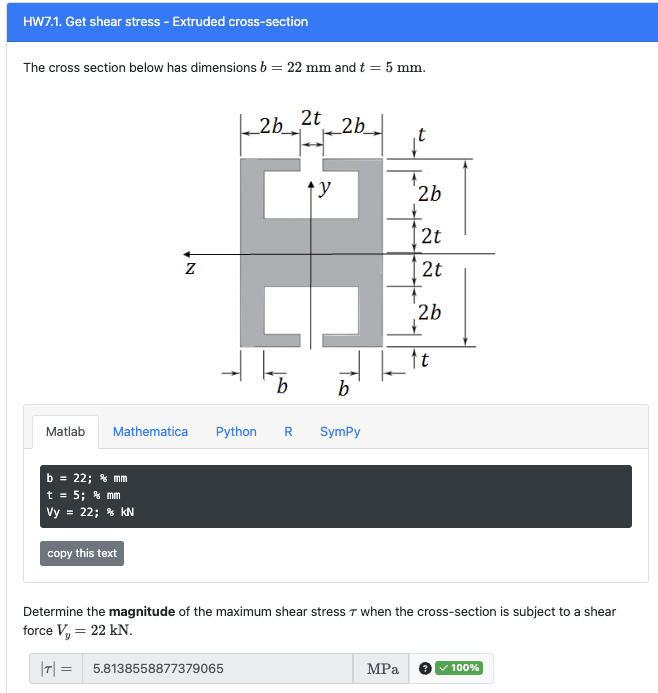

In [17]:
# 1
# 注意这个题很容易把竖直的第一个长度以为成t，但是实际上是b
# 简单的算3个tao即可

from sympy import *

b = 22 # mm
t = 5 # mm
Vy = 22 # kN
#################################

mm=1e-3;b*=mm;t*=mm;Vy/=mm

I1=1/12*2*b*(t)**3+(t/2+2*b+2*t)**2*2*b*t
I2=1/12*b*(2*b)**3+(2*t+b)**2*(2*b*b)
I3=1/12*(4*b+2*t)*(4*t)**3
I=I1*4+I2*4+I3

Q1=(1/2*t+2*b+2*t)*(2*b*t)
Q2=Q1+(2*t+b)*(2*b*b)
Q3=Q2+t*(2*t*(t+2*b))
t1=2*b
t2=b
t3=2*b+t


tao1=Q1*Vy/I/t1
tao2=Q2*Vy/I/t2
tao3=Q3*Vy/I/t3

print(max(tao1,tao2,tao3)/1e6)



5.8138558877379065


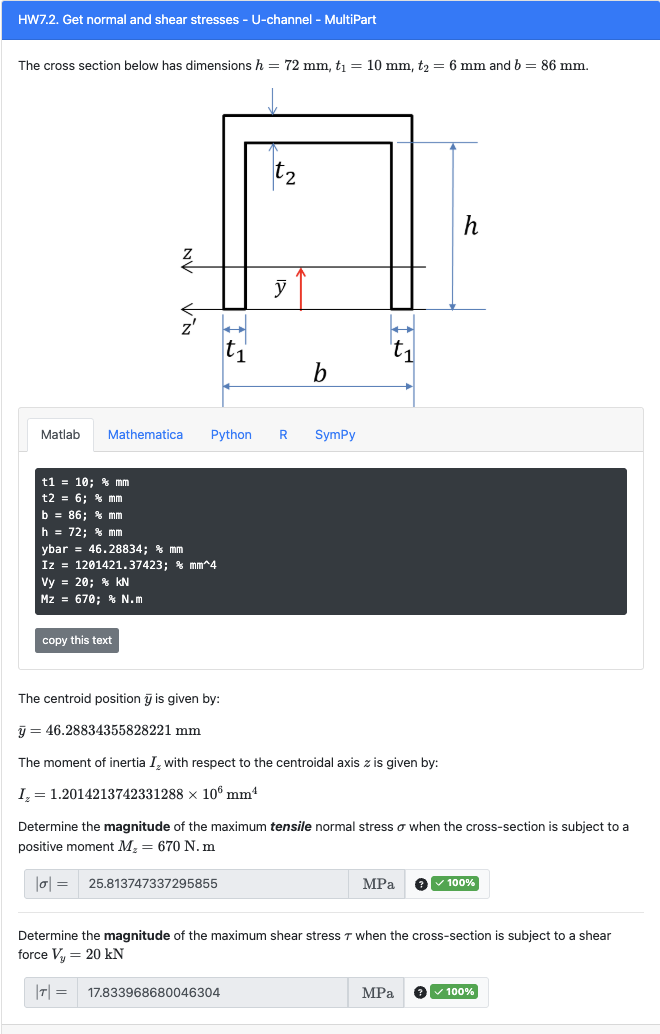

In [18]:
# 2

from sympy import *

t1 = 10 # mm
t2 = 6 # mm
b = 86 # mm
h = 72 # mm
ybar = 46.28834 # mm
Iz = 1201421.37423 # mm^4
Vy = 20 # kN
Mz = 670 # N.m
##################################

mm=1e-3;t1*=mm;t2*=mm;b*=mm;h*=mm;ybar*=mm;Iz*=mm**4;Vy*=1e3


# 如果是tensile 选下面
c=ybar
sigma=Mz*c/Iz
# 如果是compressive 选下面
# c=h+t2-ybar
# sigma=Mz*c/Iz
print(sigma/1e6)

y1=t2/2+h-ybar
A1=t2*b
y2=1/2*(h-ybar)
A2=2*(h-ybar)*t1

Q=y1*A1+y2*A2
print(Q*Vy/Iz/(2*t1)/1e6)




25.813747337295855
17.833968680046304


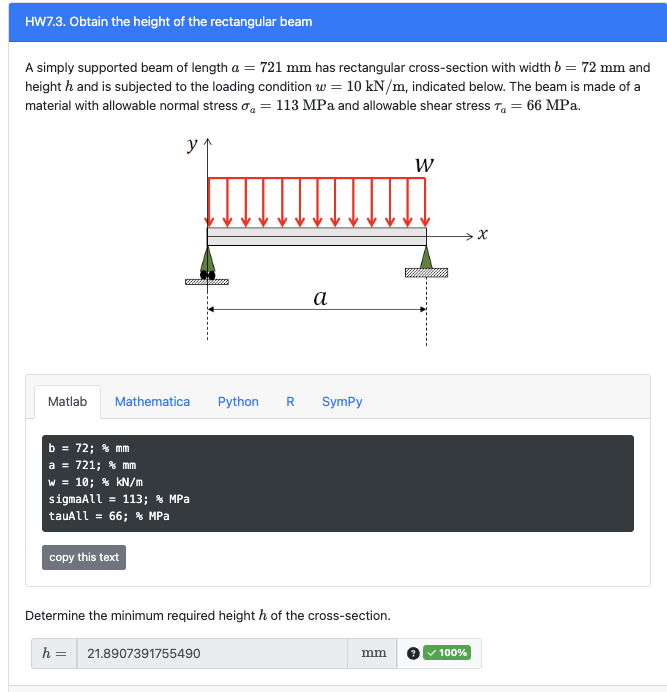

In [19]:
# 3
from sympy import *

from sympy import *

b = 72 # mm
a = 721 # mm
w = 10 # kN/m
sigmaAll = 113 # MPa
tauAll = 66 # MPa
################################

mm=1e-3;b*=mm;a*=mm;w/=mm;sigmaAll*=1e6;tauAll*=1e6


h=S('h')
M=w*a**2/8
c=h/2
I=1/12*b*h**3
sigma_cal=M*c/I
an1=solve([sigmaAll-sigma_cal],[h])[1][0]


V=w*a/2
t=b
Q=h/4*(h/2*b)
tao_cal=V*Q/I/t
an2=solve([tauAll-tao_cal],[h])[h]


print(max(an1,an2)/mm)


21.8907391755490


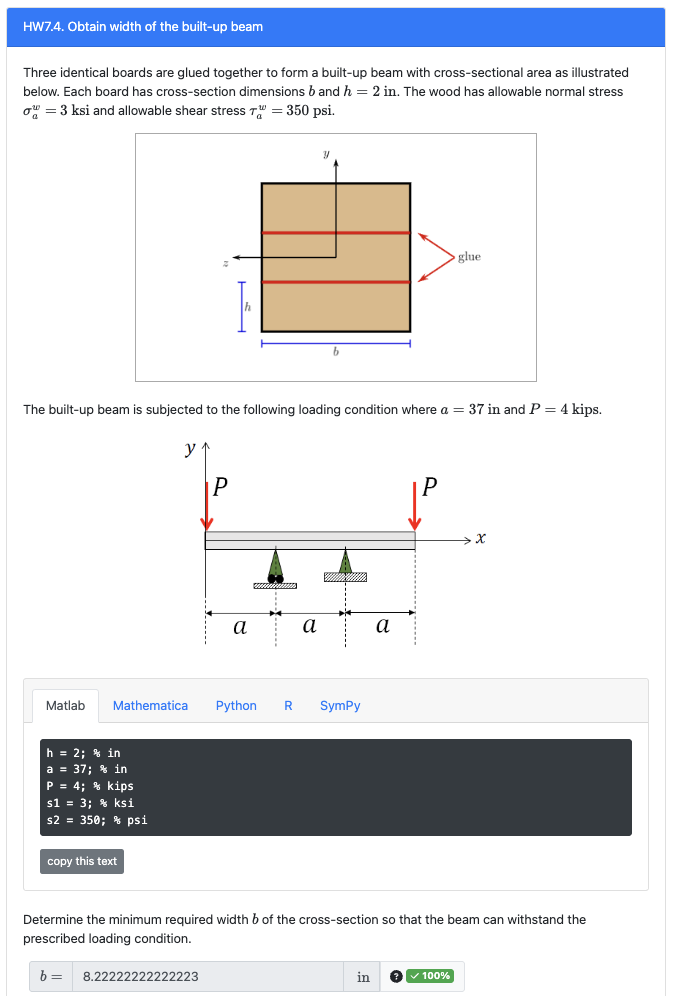

In [7]:
# 4
# 还是就用到一个公式 tao=V*Q/I*t
# 但是胶水断裂对应一个tao Q2，然后木板断裂对应一个tao Q1，其实就是要求两个位置的剪切应力tao，然后对比一下max


# 这个题有时候s1是sheer stress有时候是 normal stress 判定一下s1大小就行,注意s1有大小

# 注意哦 这里为了满足条件，所以反而取的是较大的b，否则另外一个就超过界限了




from sympy import *

h = 2 # in
a = 34 # in
P = 5 # kips
s1 = 417 # psi
s2 = 216 # psi

P*=1e3

b=S('b')
t=b



# 这里图有可能变化 

V=P
M=P*a

# V=P/2
# M=P*a/2

I=1/12*b*(3*h)**3


sigma_cal=M*h*3/2/I



# 木板
Q1=3/4*h*(3/2*h*b)
tao1=V*Q1/I/t

# 胶水
Q2=h*h*b
tao2=V*Q2/I/t



if s1<10:
    b1=solve([sigma_cal-s1*1e3],[b])[b]
    b2=solve([tao2-s2],[b])[b]
    print(max(b1,b2))


else:
# 注意哦 这里为了满足条件，所以反而取的是较大的b，否则另外一个就超过界限了
    b1=solve([tao1-s1],[b])[b]
    b2=solve([tao2-s2],[b])[b]
    print(max(b1,b2))




5.14403292181070


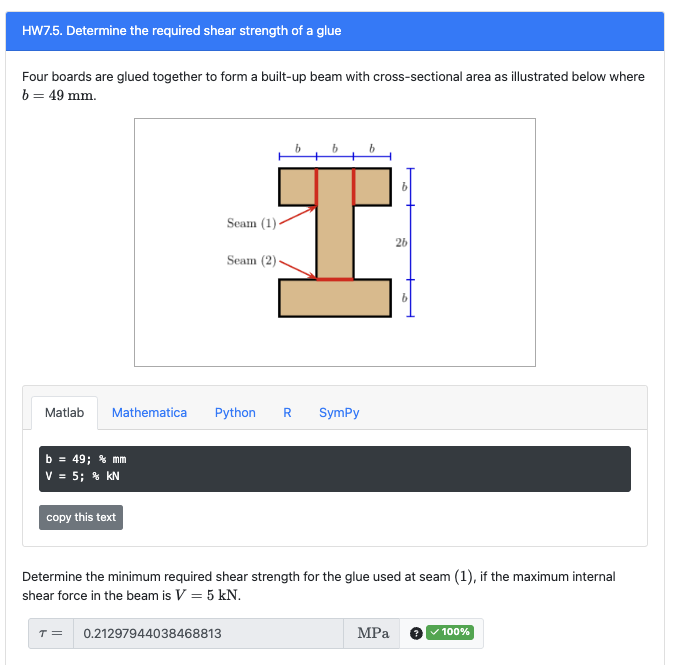

In [2]:
# 5
# 全是胶水的话 就直接球就行
# 这个题考虑剪切流，q/垂直q方向的截线段长度
# 先求两个位点的Q，第一个是左边小方块的

from sympy import *

b = 49 # mm
V = 5 # kN

# ###################
b*=1e-3;V=V*1e3

I1=1/12*(3*b)*(b)**3+(3/2*b)**2*(3*b*b)
I2=1/12*b*(2*b)**3
I=2*I1+I2
print(I)

# 让1胶水断裂
y1=3/2*b
A1=b*b
Q1=y1*A1
t=b
tao1=V*Q1/I/t






y2=3/2*b
A2=(3*b*b)
Q2=y2*A2
t=b
tao2=V*Q2/I/t


print('tao1',tao1/1e6)
print('tao2',tao2/1e6)



8.455041466666671e-05
tao1 0.21297944038468813
tao2 0.6389383211540645


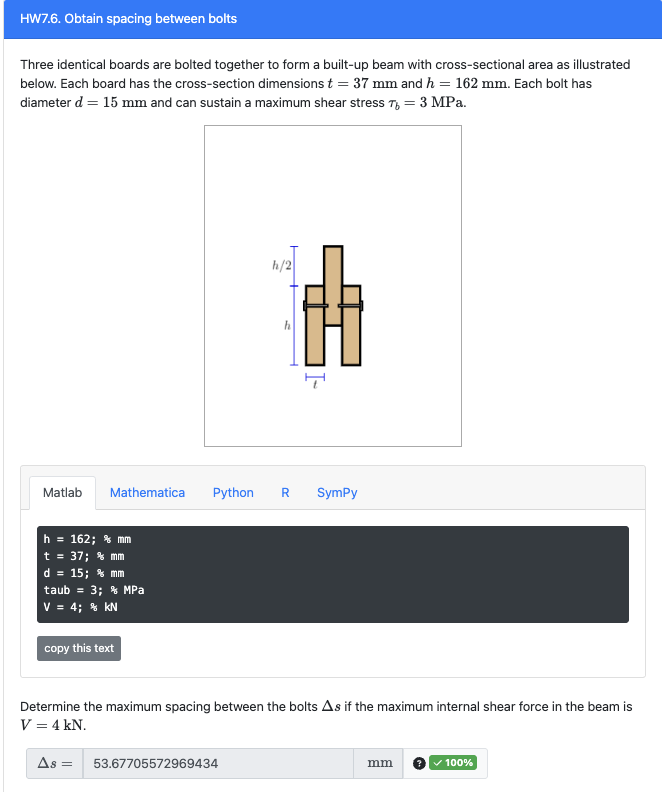

In [4]:
# 6
# 首先算出来F 因为这个F是作用在钉子上面的，所以tao变成了一个新的sigma2 *A=F sigma2=F/A 
# 然后找到Q 就是中间的这个块 因为它马上就掉下去了
# 根据下面的两个等式得到s   中间的倍数可能是任意的 应该是1/2     Q->1/2q=F/s 



from sympy import *

h = 162 # mm
t = 37 # mm
d = 15 # mm
taub = 3 # MPa
V = 4 # kN

#################################
mm=1e-3;h*=mm;t*=mm;d*=mm;taub*=1e6;V*=1e3


y1=h/2
s1=2*h*t
y2=h
s2=h*t
ybar=(y1*s1+y2*s2)/(s1+s2)
print(ybar)

I1=1/12*(t)*(h)**3+(1/2*h-ybar)**2*h*t
I2=1/12*(t)*(h)**3+(h-ybar)**2*h*t
I=I1*2+I2
print(I)


y1=h-ybar
A1=h*t
Q1=y1*A1

q=V*Q1/I

A=1/4*pi*d**2

F=taub*A


s=2*F/q 

print(float(s)*1e3)


0.108
6.554439e-05
53.67705572969434


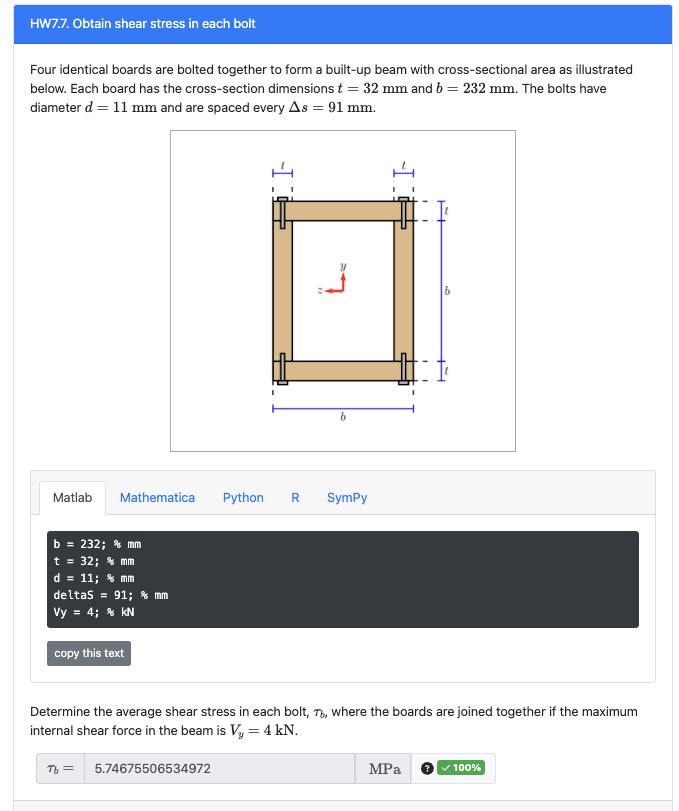

In [6]:
# 7
# Q取上面的，然后两个F, 同理用这个式子Q->1/2q=F/s
# taob=F/A

from sympy import *

b = 231 # mm
t = 32 # mm
d = 15 # mm
deltaS = 109 # mm
Vy = 3 # kN
#############################
mm=1e-3;b*=mm;t*=mm;d*=mm;deltaS*=mm;Vy*=1e3

I1=1/12*b*t**3+(1/2*t+1/2*b)**2*(b*t)
I2=1/12*t*b**3
I=I1*2+I2*2

y1=1/2*(t+b)
A1=b*t 
Q=y1*A1

A=pi/4*d**2

q=Vy*Q/I

F=q*1/2*deltaS

taob=F/A
print(taob.evalf()/1e6)

2.78740534486910


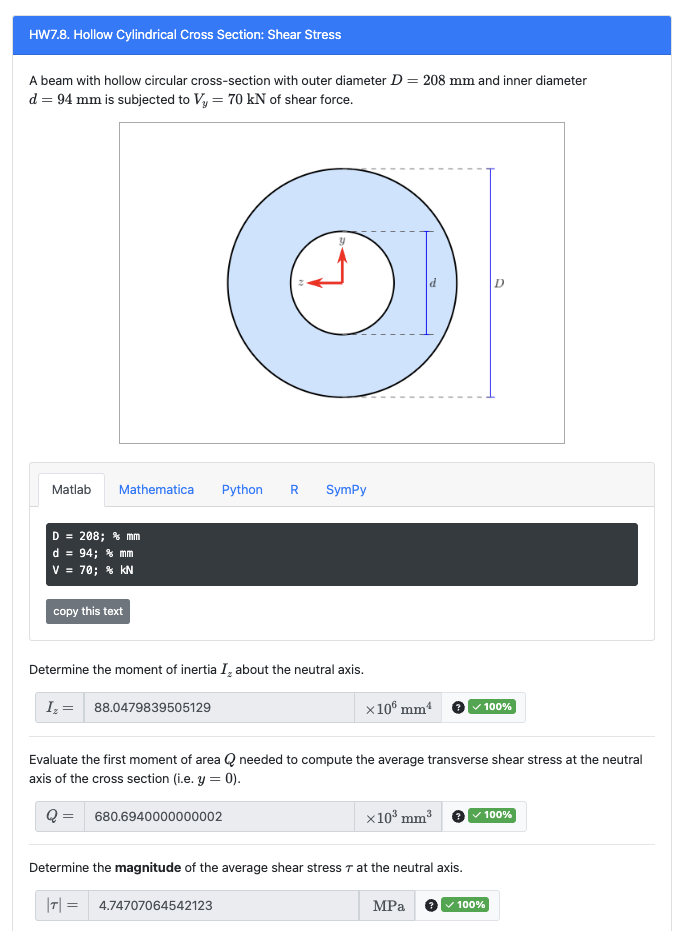

In [24]:
# 8
from sympy import *

D = 208 # mm
d = 94 # mm
V = 70 # kN
#################
D*=1e-3;d*=1e-3;V*=1e3

I=pi/4*((D/2)**4-(d/2)**4)
# 一半位置的Q,直接做差即可
Q=2/3*((D/2)**3-(d/2)**3)
t=D-d 


tao=V*Q/I/t
print(I.evalf()/1e6/1e-12)
print(Q/1e-9/1e3)
print(tao.evalf()/1e6)

88.0479839505130
680.6940000000001
4.74707064542123


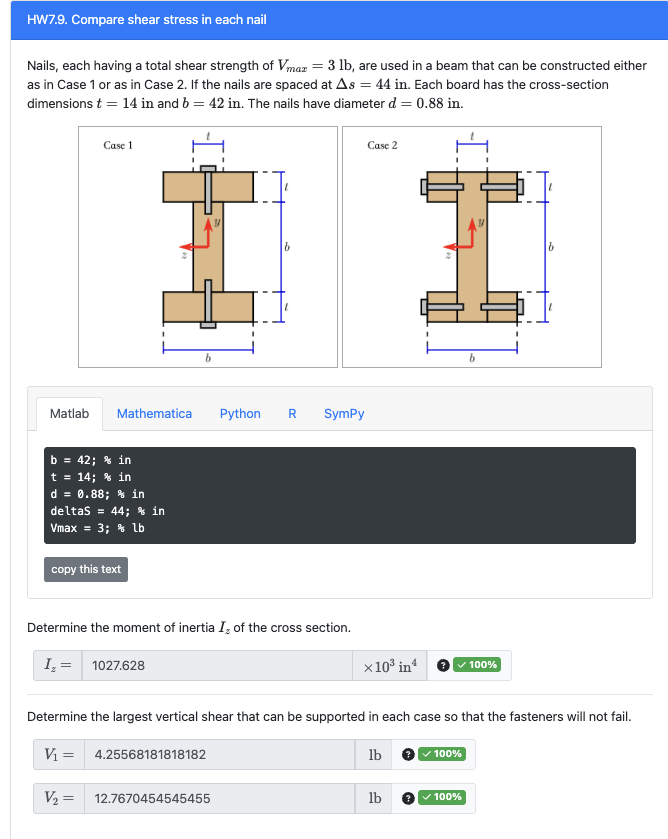

In [25]:
# 9
# 这个题相当于告诉你qmax然后算V
# 注意右边Qmax在到达切割点，从上往下数t+b的位置
# 我感觉在低点会给到两个qmax，然后凑起来总体的q2，但是我现在不确定！！！！！！！！！！！！



from sympy import *

b = 42 # in
t = 14 # in
d = 0.88 # in
deltaS = 44 # in
Vmax = 3 # lb
###############################

qmax=Vmax/deltaS

V1,V2=S('V1,V2')

I1=1/12*b*t**3+(1/2*(t+b))**2*(b*t)
I2=1/12*t*b**3
I=2*I1+I2

print(I/1e3)

y1=1/2*(t+b)
A1=b*t
Q1=y1*A1
q1=V1*Q1/I






y2=1/2*(b-t)
A2=(t+b)*t
Q2=y2*A2

q2=V2*Q2/I



print(solve([qmax-q1],[V1]))
print(solve([qmax-1/2*q2],[V2]))





1027.628
{V1: 4.25568181818182}
{V2: 12.7670454545455}
